# Breast Cancer synthetic data
## Part 2. Data analysis - comparison KNL vs SEER

#### by Grzegorz Furdyn

## Contents

### Correlations between clinical features and survival rate (NKR vs SEER)]

   * [1. Cancer stadium and age group](#stad)
   * [2. Tumor grade (Differentiatiegraad)](#diff)
   * [3. Cancer morphology](#morf)
   * [4. Tumor size](#size)
   * [5. Survival rate by stadium, as function of time after detection](#years)
   * [6. Correlation between tumor dimension and the existence of positive nodes](#nodes)
   * [7. Progesterone Receptor (PR) and Estrogen Receptor (ER) Status](#erpr)



The analysis in this part is based on SEER Monograph:
<br>
Ries LAG, Young JL, Keel GE, Eisner MP, Lin YD, Horner M-J (editors). SEER Survival Monograph: Cancer Survival Among Adults: U.S. SEER Program, 1988-2001, Patient and Tumor Characteristics. National Cancer Institute, SEER Program, NIH Pub. No. 07-6215, Bethesda, MD, 2007.
<br>
Chapter 7. Cancer of the Female Breast, by Lynn A. Gloeckler Ries and Milton P. Eisner

https://seer.cancer.gov/archive/publications/survival/index.html





<a id='veri'></a>
### Correlations between clinical features and survival rate (NKR vs SEER)

In this section, correlations between clinical features and survival rate will be explored, and compared with respective results from SEER monograph. SEER data have been copied into csv files.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
matplotlib.rcParams.update({'font.size': 12})

In [2]:
df = pd.read_csv('Breast_cancer_transformed.csv')

In [3]:
categorical_features = [ 'tumsoort',
                         'diag_basis',
                         'topo_sublok',
                         'later',
                         'morf',
                         'gedrag',
                         'ct',
                         'cn',
                         'cm',
                         'pt',
                         'pn',
                         'pm',
                         'stadium',
                         'cstadium', 
                         'pstadium',
                         'er_stat',
                         'pr_stat',
                         'her2_stat',
                         'dcis_comp',
                         'multifoc',
                         'swk',
                         'swk_uitslag',
                         'mari',
                         'mari_uitslag',
                         'okd',
                         'org_chir',
                         'uitgebr_chir_code',
                         'dir_reconstr',
                         'chemo',
                         'target',
                         'horm',
                         'rt',
                         'meta_rt',
                         'meta_chir']

In [4]:
numeric_features = ['leeft',
                     'diffgrad',
                     'ond_lymf',
                     'pos_lymf',
                     'tum_afm']

In [5]:
df[categorical_features] = df[categorical_features].astype(str)

<a id='stad'></a>
#### 1. Cancer stadium

We will extract from data the relationship between cancer stadium and 5Y survival rate, and compare it on one plot with the same relationship from SEER (2007)

In [6]:
stadium_nkr = df.groupby(by = 'stadiumtot').mean()['survival_5Y'].iloc[:5].to_frame()

In [7]:
stadium_nkr['survival_5Y'] = stadium_nkr['survival_5Y'] *100
stadium_nkr.index = stadium_nkr.index.astype(int)
stadium_nkr

,survival_5Y
stadiumtot,
0,94.967532
1,81.991424
2,82.011834
3,81.803279
4,83.146067


The same data from SEER

In [8]:
stadium_seer = pd.read_csv('RSR by stadium.csv', delimiter = ';', index_col=0)
stadium_seer

,Total
Stadium,
0,100.0
1,100.0
2,86.2
3,57.2
4,19.9


In [9]:
stadium_compar = stadium_seer.merge(stadium_nkr, right_index=True, left_on='Stadium')

In [10]:
stadium_compar.columns = ['SEER (2007)', 'NKR_synthetische_data']

In [11]:
stadium_compar

,SEER (2007),NKR_synthetische_data
Stadium,,
0,100.0,94.967532
1,100.0,81.991424
2,86.2,82.011834
3,57.2,81.803279
4,19.9,83.146067


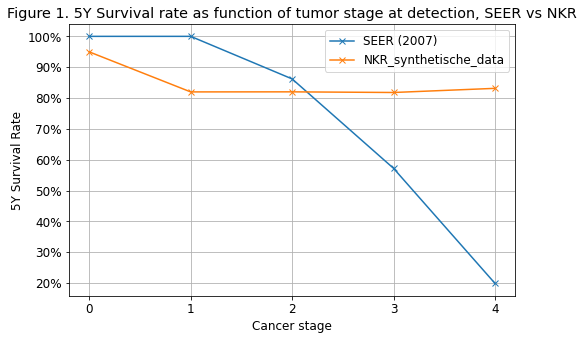

In [12]:
ax = stadium_compar.plot(kind = 'line', figsize = (8,5), grid = True, xticks=[0,1,2,3,4], ylabel = '5Y Survival Rate', 
                         xlabel = 'Cancer stage', marker='x',
                         title = 'Figure 1. 5Y Survival rate as function of tumor stage at detection, SEER vs NKR')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

<a id='diff'></a>
#### 2. Tumor grade (Differentiatiegraad)

In [13]:
grade_nkr = df.groupby(['diffgrad', 'stadiumtot']).mean()['survival_5Y'].unstack().iloc[:3,:5]
grade_nkr = grade_nkr.apply(lambda x: x*100)
grade_nkr.columns.name = 'Cancer stage'

(0.0, 100.0)

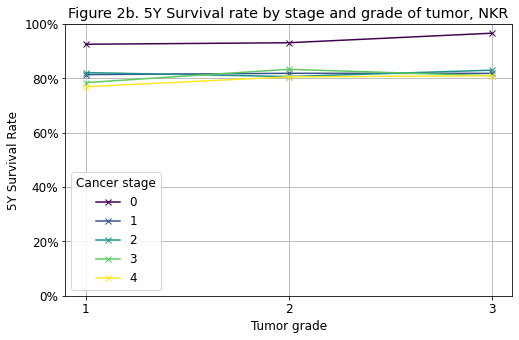

In [14]:
ax = grade_nkr.plot(kind = 'line', figsize = (8,5), grid = True, xticks=[1,2,3], ylabel = '5Y Survival Rate', marker='x',
                    xlabel = 'Tumor grade', title = 'Figure 2b. 5Y Survival rate by stage and grade of tumor, NKR', 
                    colormap = 'viridis')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.ylim(0, 100)

In [15]:
grade_seer = pd.read_csv('RSR_by_grade_and_stage.csv', delimiter = ';', index_col=0).iloc[1:5, 1:5]
grade_seer.columns = ['Stage 1', 'Stage 2','Stage 3', 'Stage 4']
grade_seer

,Stage 1,Stage 2,Stage 3,Stage 4
1,100.0,98.7,79.4,31.1
2,100.0,91.4,69.3,26.9
3,96.8,79.6,50.9,17.1
4,98.2,80.2,53.8,13.8


(0.0, 100.0)

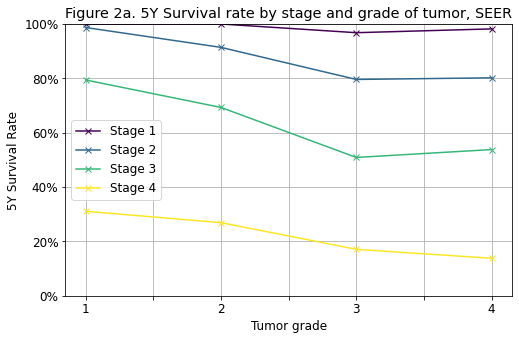

In [16]:
ax = grade_seer.plot(kind = 'line', figsize = (8,5), grid = True, ylabel = '5Y Survival Rate', xlabel = 'Tumor grade', 
                     title = 'Figure 2a. 5Y Survival rate by stage and grade of tumor, SEER', colormap = 'viridis', marker='x')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.ylim(0, 100)

<a id='morf'></a>
#### 3. Cancer morphology

In [17]:
morflist = df['morf'].value_counts().head(5).index.tolist() # create a list of 5 most frequent 'morf' values
morflist

['8500', '8520', '8522', '8524', '8504']

In [18]:
df_morflist = df[df['morf'].isin(morflist)]

In [19]:
morf_nkr = df_morflist.groupby(['morf', 'stadiumtot']).mean()['survival_5Y'].unstack().T.iloc[:5]
morf_nkr = morf_nkr.apply(lambda x: x*100)

In [20]:
morf_nkr = morf_nkr.rename(columns={'8500': 'Ductaal carcinoom, NNO', '8504': 'Omkapseld (intracysteus) papillair carcinoom',
                        '8520': 'Lobulair carcinoom, NNO', '8522': 'Ductaal en lobulair carcinoom',
                        '8524': 'Lobulair carcinoom gemengd met ander carcinoomtype'})
morf_nkr

morf,"Ductaal carcinoom, NNO",Omkapseld (intracysteus) papillair carcinoom,"Lobulair carcinoom, NNO",Ductaal en lobulair carcinoom,Lobulair carcinoom gemengd met ander carcinoomtype
stadiumtot,,,,,
0,94.433400,100.000000,100.000000,100.000000,100.0
1,81.585678,85.714286,83.773585,69.230769,87.5
2,81.600000,83.333333,83.743842,81.481481,84.0
3,83.043478,100.000000,76.712329,84.615385,25.0
4,85.454545,NaN,88.888889,25.000000,100.0


(0.0, 100.0)

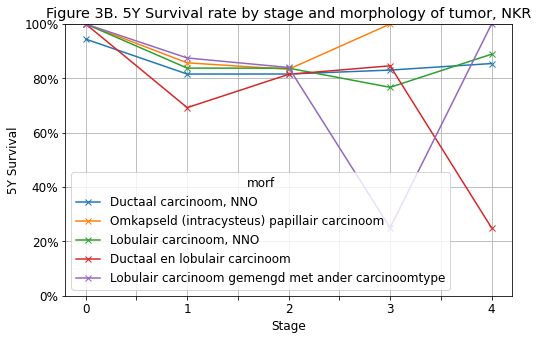

In [21]:
ax = morf_nkr.plot(kind = 'line', ylabel='5Y Survival', figsize = (8,5), grid = True, xlabel = 'Stage', marker='x',
                  title = 'Figure 3B. 5Y Survival rate by stage and morphology of tumor, NKR')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.ylim(0, 100)

In [22]:
morf_seer = pd.read_csv('SEER_morf.csv', delimiter = ';', index_col=0)#.iloc[1:16, 1:5]
morf_seer = morf_seer.sort_values('Number', ascending = False).head(6).iloc[1:6, 2:6].T
morf_seer

,Infiltrating duct,Lobular,Infiltrating duct & lobular,Mucinous adeno,Other Non-adeno
1,100.0,100.0,100.0,100.0,99.2
2,85.1,93.0,91.4,94.8,80.1
3,57.5,72.6,69.8,75.0,42.4
4,20.3,30.5,29.0,33.8,13.8


(0.0, 100.0)

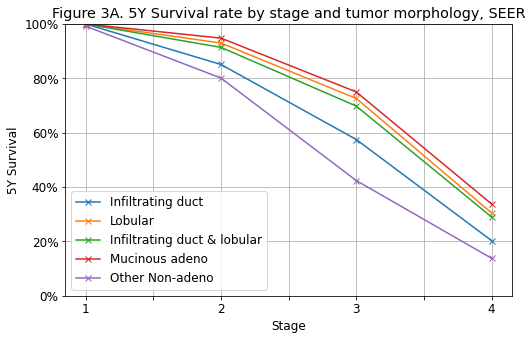

In [23]:
ax = morf_seer.plot(kind = 'line', ylabel='5Y Survival', figsize = (8,5), grid = True, xlabel = 'Stage', marker='x',
                   title = 'Figure 3A. 5Y Survival rate by stage and tumor morphology, SEER')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.ylim(0, 100)

<a id='size'></a>
#### 4. Tumor size

In [24]:
size_nkr = df.groupby(['tum_afm_range', 'stadiumtot']).mean()['survival_5Y'].unstack().iloc[:,:5]
size_nkr = size_nkr.apply(lambda x: x*100)
size_nkr.columns.name = 'Cancer stage'
size_nkr

Cancer stage,0,1,2,3,4
tum_afm_range,,,,,
0,100.000000,85.964912,65.217391,75.000000,100.000000
1-7,90.789474,81.871345,77.600000,78.048780,87.500000
13-17,97.777778,81.411765,80.444444,73.584906,87.500000
18-22,94.736842,84.671533,83.732057,82.978723,100.000000
23-30,93.333333,75.000000,83.985765,84.745763,61.538462
31-60,100.000000,87.096774,82.075472,78.947368,66.666667
61-90,100.000000,86.666667,80.701754,84.090909,66.666667
8-12,96.551724,84.383562,82.285714,87.804878,88.888889
91+,100.000000,77.777778,88.636364,83.333333,100.000000


(50.0, 100.0)

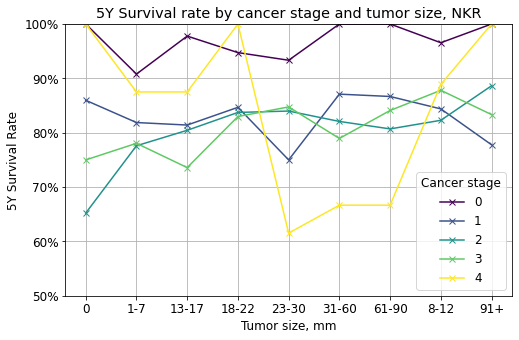

In [25]:
ax = size_nkr.plot(kind = 'line', figsize = (8,5), grid = True, ylabel = '5Y Survival Rate', xlabel = 'Tumor size, mm', 
                   colormap = 'viridis', marker='x', title = '5Y Survival rate by cancer stage and tumor size, NKR')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.ylim(50, 100)

In [26]:
nodes_nkr = df.groupby(['tum_afm_range', 'pos_lymf_range']).mean()['survival_5Y'].unstack()
nodes_nkr = nodes_nkr.apply(lambda x: x*100)
nodes_nkr.columns.name = 'Number of Nodes'
nodes_nkr

Number of Nodes,1-3 Positive,4+ Positive,Negative
tum_afm_range,,,
0,81.481481,72.727273,84.285714
1-7,79.130435,80.000000,82.994924
13-17,84.810127,80.000000,81.048387
18-22,87.096774,83.870968,84.340659
23-30,79.259259,82.978723,82.432432
31-60,82.978723,89.655172,80.952381
61-90,76.744186,76.595745,89.147287
8-12,88.372093,87.209302,83.944954
91+,95.000000,92.000000,84.848485


(50.0, 100.0)

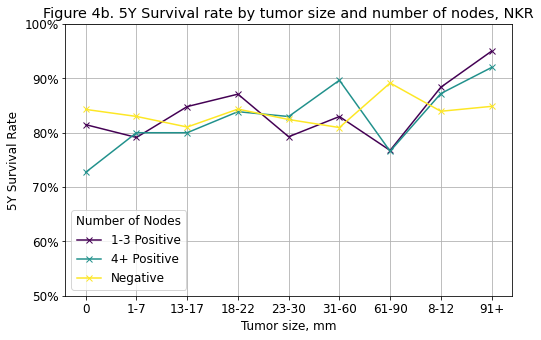

In [27]:
ax = nodes_nkr.plot(kind = 'line', figsize = (8,5), grid = True, ylabel = '5Y Survival Rate', xlabel = 'Tumor size, mm',
                    colormap = 'viridis', title = 'Figure 4b. 5Y Survival rate by tumor size and number of nodes, NKR', 
                    marker='x')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.ylim(50, 100)

<a id='years'></a>
#### 5. Survival rate by stadium, as function of time after detection

We are going to create a table showing the survival rate of patients as a function of years after cancer detection, and cancer stadium at detection.

First, create a table containing numbers of patients per cancer stadium, and number of years they lived (variable "year after diagnosis).

In [28]:
sr_by_time = df.groupby(['years_after_diagnosis', 'stadium']).count()['vit_stat'].reset_index()

In [29]:
sr_by_time['years_after_diagnosis'] = sr_by_time['years_after_diagnosis'].astype(int)

In [30]:
sr_by_time.head()

,years_after_diagnosis,stadium,vit_stat
0,0,1A,34
1,0,1B,2
2,0,2A,13
3,0,2B,18
4,0,3B,5


Construct a column with initial number of patients by cancer stadium

In [31]:
patients_init = df.groupby('stadium').count()['vit_stat']
patients_init

stadium
0           616
1A         1978
1B          121
2A          814
2B          876
3A          201
3B          203
3C          206
4            89
M           101
unknown      36
Name: vit_stat, dtype: int64

In [32]:
sr_by_time = sr_by_time.merge(patients_init, on = 'stadium')
sr_by_time.set_index('years_after_diagnosis', inplace=True)
sr_by_time.columns = ['stadium', 'vit_stat', 'patients_init']

In [33]:
sr_by_time.head()

,stadium,vit_stat,patients_init
years_after_diagnosis,,,
0,1A,34,1978
1,1A,41,1978
2,1A,64,1978
3,1A,99,1978
4,1A,123,1978


We create auxiliary table containing the number of patients who died before and including a given year, by stadium ("non_survivors")

In [34]:
df_aux = pd.DataFrame()
for i in sr_by_time.index.unique():
    for j in sr_by_time['stadium'].unique():
        df_aux.loc[i,j] = sr_by_time[sr_by_time['stadium'] == j].loc[:i, 'vit_stat'].sum()

In [35]:
df_aux = df_aux.unstack().to_frame('non_survivors')
df_aux.index.names = ['stadium','years_after_diagnosis']

In [36]:
sr_by_time.reset_index(inplace = True)
sr_by_time.set_index(['stadium', 'years_after_diagnosis'], inplace = True)
sr_by_time.head()

vit_stat  patients_init
stadium years_after_diagnosis                         
1A      0                            34           1978
        1                            41           1978
        2                            64           1978
        3                            99           1978
        4                           123           1978

In [37]:
sr_by_time = pd.merge(sr_by_time, df_aux, how = 'left', left_on=['stadium', 'years_after_diagnosis'], 
                 right_on=['stadium', 'years_after_diagnosis'])

In [38]:
sr_by_time['survivors_fin'] = sr_by_time['patients_init'] - sr_by_time['non_survivors']

In [39]:
sr_by_time['survivors_perc'] = sr_by_time['survivors_fin']/sr_by_time['patients_init']*100

In [40]:
sr_by_time.head(10)

vit_stat  patients_init  non_survivors  \
stadium years_after_diagnosis                                           
1A      0                            34           1978           34.0   
        1                            41           1978           75.0   
        2                            64           1978          139.0   
        3                            99           1978          238.0   
        4                           123           1978          361.0   
        5                           181           1978          542.0   
1B      0                             2            121            2.0   
        1                             1            121            3.0   
        2                             2            121            5.0   
        3                             6            121           11.0   

                               survivors_fin  survivors_perc  
stadium years_after_diagnosis                                 
1A      0                             1944.0       98.281092  
        1                             1903.0       96.208291  
        2                             1839.0       92.972700  
        3                             1740.0       87.967644  
        4                             1617.0       81.749242  
        5                             1436.0       72.598584  
1B      0                              119.0       98.347107  
        1                              118.0       97.520661  
        2                              116.0       95.867769  
        3                              110.0       90.909091

In [41]:
reorderlist = ['0', '1A', '1B', '2A', '2B', '3A', '3B', '3C', '4', 'M', 'unknown']

In [42]:
sr_by_time = sr_by_time.reindex(reorderlist, level=0)

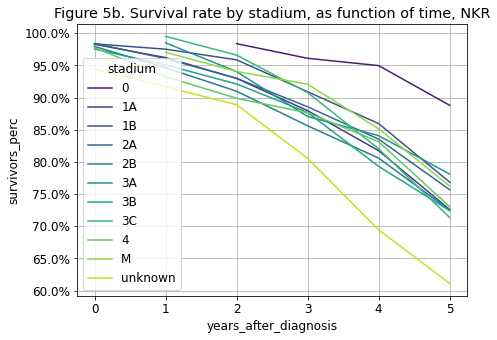

In [43]:
plt.figure(figsize = (7,5))
ax = sns.lineplot(data = sr_by_time, x = 'years_after_diagnosis', y = 'survivors_perc', hue = 'stadium', palette = 'viridis',
                 markers = True)
ax.set_title('Figure 5b. Survival rate by stadium, as function of time, NKR')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.grid()

<a id='nodes'></a>
#### 6. Correlation between tumor dimension and existence of positive nodes

In [44]:
nodes_knr = df.groupby('tum_afm_range').mean()['pos_lymf_ind']

In [45]:
nodes_knr = nodes_knr.dropna()
nodes_knr = nodes_knr.to_frame('positive_nodes_perc')

In [46]:
nodes_knr['positive_nodes_perc'] = nodes_knr['positive_nodes_perc'] * 100
nodes_knr

,positive_nodes_perc
tum_afm_range,
0,35.185185
1-7,35.303777
13-17,35.078534
18-22,37.349398
23-30,38.230384
31-60,37.623762
61-90,41.095890
8-12,33.026114
91+,40.540541


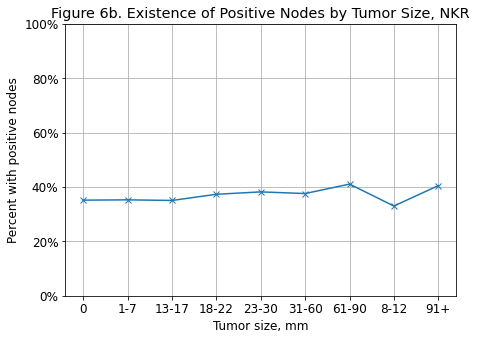

In [47]:
ax = nodes_knr.plot(kind = 'line', marker='x', figsize = (7,5), grid = True, ylabel = 'Percent with positive nodes', 
                    xlabel = 'Tumor size, mm', legend = None, 
                    title = 'Figure 6b. Existence of Positive Nodes by Tumor Size, NKR')
ax.set_ylim(0, 100)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

<a id='erpr'></a>
#### 7. Progesterone Receptor (PR) and Estrogen Receptor (ER) Status

In [48]:
erpr = df.groupby(['er_stat', 'pr_stat']).mean()['survival_5Y']
erpr

er_stat  pr_stat
0.0      0.0        0.819936
         1.0        0.625000
         9.0        1.000000
1.0      0.0        0.832718
         1.0        0.819913
         9.0        0.904762
         unknown    1.000000
9.0      0.0        0.755102
         1.0        0.787879
         9.0        0.826087
         unknown    1.000000
unknown  0.0        0.871795
         1.0        0.700000
         9.0        1.000000
         unknown    0.948000
Name: survival_5Y, dtype: float64

In [49]:
erpr = erpr.unstack().iloc[:2,:2]

In [50]:
erpr.style.format('{:.1%}')

pr_stat,0.0,1.0
er_stat,,
0.0,82.0%,62.5%
1.0,83.3%,82.0%
